In [ ]:
import pandas as pd

df = pd.read_csv("mountains_db.tsv", sep="\t", header=None, names=["Name", "Elevation", "Country", "Code"])
display(df.head())

,Name,Elevation,Country,Code
0,Hooiberg,NaN,Aruba,ABW
1,Jamanota,188.0,Aruba,ABW
2,Katia,406.0,Guinea,GIN
3,Niankola,898.0,Guinea,GIN
4,Dougo Kourou,449.0,Guinea,GIN


In [26]:
unique_country_code_values = len(df['Code'].unique())
print(f"{unique_country_code_values} unique country code value{'s' if unique_country_code_values != 1 else ''}.")
missing_altitude_values = df['Elevation'].isnull().sum()
print(f"{missing_altitude_values} missing altitude value{'s' if missing_altitude_values != 1 else ''}.")
print(df['Elevation'].describe())
N = 10
print(f"Top {N} elevations: {sorted(df['Elevation'].dropna(), reverse=True)[:N]}")

256 unique country code values.
84586 missing altitude values.
count    53152.000000
mean      1286.232530
std       1109.287401
min          0.000000
25%        521.000000
50%        984.000000
75%       1660.000000
max       8172.000000
Name: Elevation, dtype: float64
Top 10 elevations: [8172.0, 8163.0, 8125.0, 8091.0, 8012.0, 8000.0, 8000.0, 7879.0, 7821.0, 7817.0]


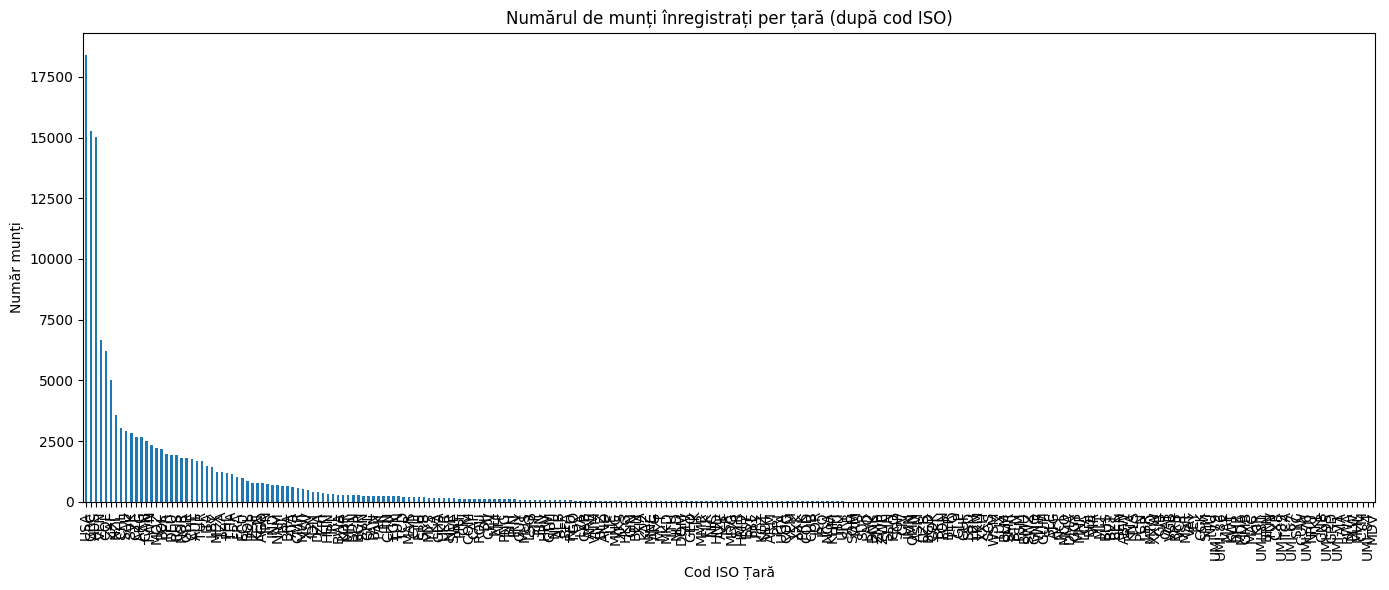

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df["Elevation"] = pd.to_numeric(df["Elevation"], errors="coerce")

# Grupăm după codul ISO al țării și numărăm munții
mount_counts = df['Code'].value_counts().sort_values(ascending=False)

# Plotare
plt.figure(figsize=(14, 6))
mount_counts.plot(kind='bar')
plt.title("Numărul de munți înregistrați per țară (după cod ISO)")
plt.xlabel("Cod ISO Țară")
plt.ylabel("Număr munți")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


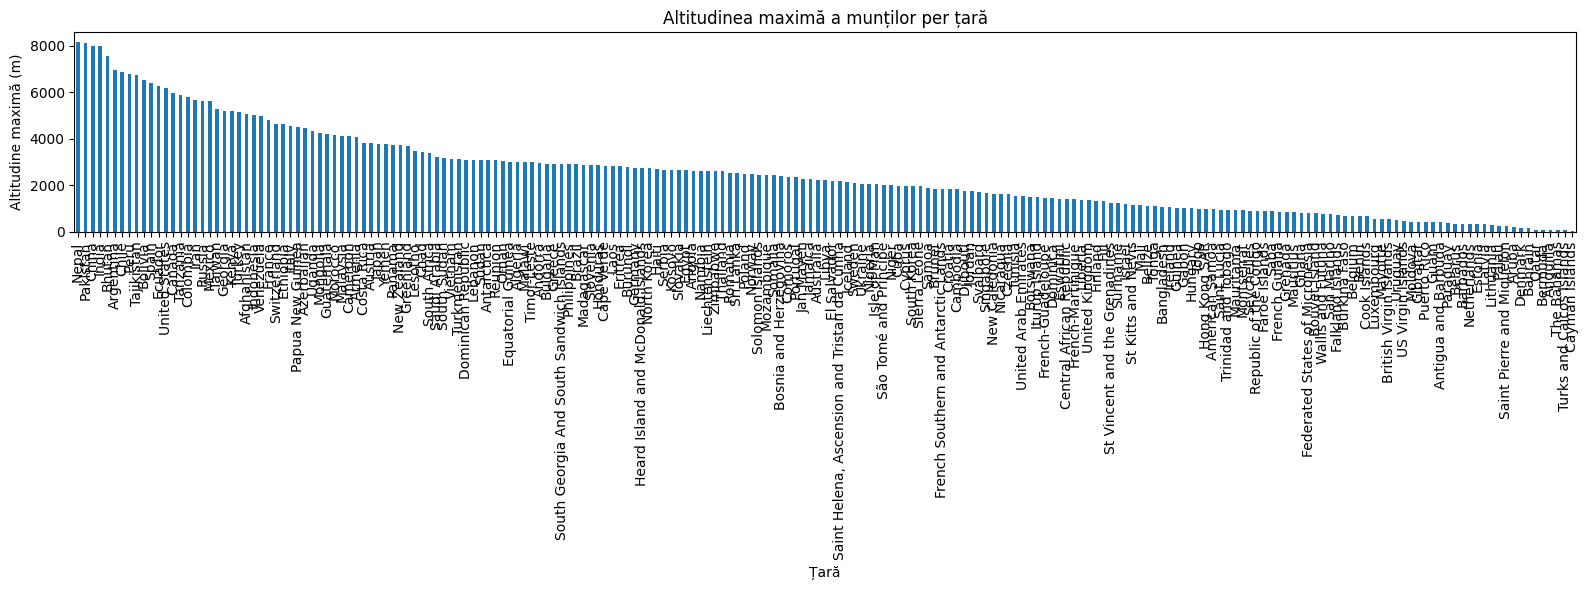

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Grupare după țară și extragerea altitudinii maxime
max_altitudes = df.groupby("Country")["Elevation"].max().dropna().sort_values(ascending=False)

# Plotare
plt.figure(figsize=(16, 6))
max_altitudes.plot(kind="bar")
plt.title("Altitudinea maximă a munților per țară")
plt.xlabel("Țară")
plt.ylabel("Altitudine maximă (m)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

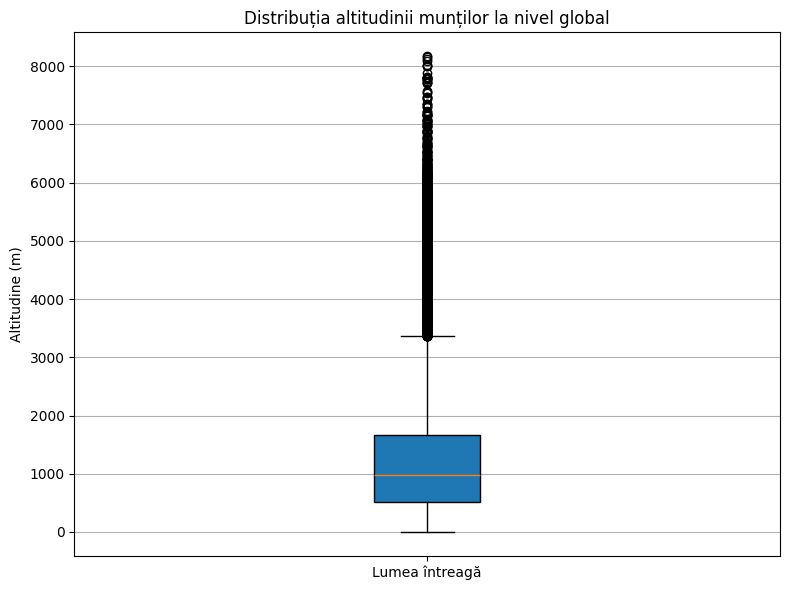

In [31]:
import matplotlib.pyplot as plt

# Eliminăm valorile lipsă
elevations = df['Elevation'].dropna()

# Plotare boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(elevations, vert=True, patch_artist=True)
plt.title("Distribuția altitudinii munților la nivel global")
plt.ylabel("Altitudine (m)")
plt.xticks([1], ["Lumea întreagă"])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

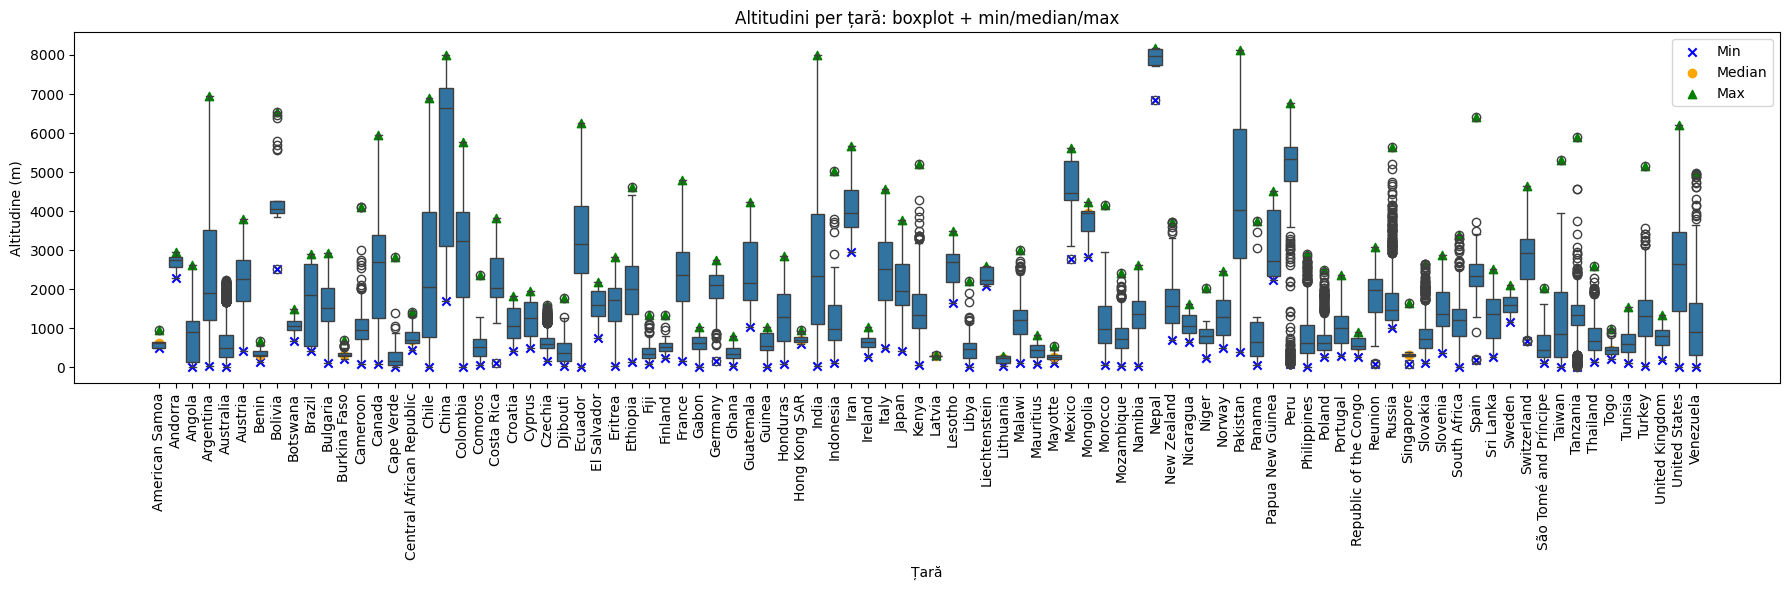

In [32]:
import seaborn as sns

# Grupăm doar țările cu cel puțin 5 munți pentru un grafic mai clar
grouped = df.dropna(subset=["Elevation"]).groupby("Country")
filtered = grouped.filter(lambda x: len(x) >= 5)

# Re-creăm gruparea pe setul filtrat
filtered_grouped = filtered.groupby("Country")

# Extragem min, median, max
summary_stats = filtered_grouped["Elevation"].agg(["min", "median", "max"])

# Plotare compusă
plt.figure(figsize=(18, 6))

# Boxplot global (cu distribuția pe fiecare țară)
sns.boxplot(data=filtered, x="Country", y="Elevation", order=summary_stats.index)

# Suprapunem min, median, max ca puncte
plt.scatter(x=range(len(summary_stats)), y=summary_stats["min"], label="Min", color="blue", marker="x")
plt.scatter(x=range(len(summary_stats)), y=summary_stats["median"], label="Median", color="orange", marker="o")
plt.scatter(x=range(len(summary_stats)), y=summary_stats["max"], label="Max", color="green", marker="^")

plt.title("Altitudini per țară: boxplot + min/median/max")
plt.xlabel("Țară")
plt.ylabel("Altitudine (m)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()